Arrius Clarke

Note(s): Remember Deliverable 1 is supposed to utilize; "Linear Regression" and "Decision Trees with some sort of pruning."


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Deliverables/ratings.csv')
ratings_small = pd.read_csv('/content/drive/MyDrive/Deliverables/ratings_small.csv')
movies = pd.read_csv('/content/drive/MyDrive/Deliverables/movies_metadata.csv')
keywords = pd.read_csv('/content/drive/MyDrive/Deliverables/keywords.csv')
credits = pd.read_csv('/content/drive/MyDrive/Deliverables/credits.csv')
links_small = pd.read_csv('/content/drive/MyDrive/Deliverables/links_small.csv')
links = pd.read_csv('/content/drive/MyDrive/Deliverables/links.csv')

<ipython-input-4-c3fbf4b96c58>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/drive/MyDrive/Deliverables/movies_metadata.csv')


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [ ]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [ ]:
ratings.tail(10)

,userId,movieId,rating,timestamp
26024279,270896,54286,4.5,1257031701
26024280,270896,54503,4.0,1257033886
26024281,270896,55820,5.0,1257031660
26024282,270896,56174,3.5,1257034085
26024283,270896,56367,4.5,1257031529
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [ ]:
ratings.shape

(26024289, 4)

In [ ]:
ratings['rating'].nunique()

10

In [ ]:
ratings['rating'].isnull().sum()

0

In [ ]:
ratings['movieId'].nunique()

45115

In [ ]:
ratings['movieId'].isnull().sum()

0

In [ ]:
ratings['timestamp'].nunique()

20549435

In [ ]:
ratings['timestamp'].isnull().sum()

0

In [ ]:
ratings['userId'].nunique()

270896

In [ ]:
ratings['userId'].isnull().sum()

0

In [ ]:
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
ratings_small.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [ ]:
ratings_small.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
ratings_small.tail(10)

,userId,movieId,rating,timestamp
99994,671,5952,5.0,1063502716
99995,671,5989,4.0,1064890625
99996,671,5991,4.5,1064245387
99997,671,5995,4.0,1066793014
99998,671,6212,2.5,1065149436
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [ ]:
ratings_small.shape

(100004, 4)

In [ ]:
ratings_small['movieId'].nunique()

9066

In [ ]:
ratings_small['movieId'].isnull().sum()

0

In [ ]:
ratings_small['timestamp'].nunique()

78141

In [ ]:
ratings_small['timestamp'].isnull().sum()

0

In [ ]:
ratings_small['rating'].nunique()

10

In [ ]:
ratings_small['rating'].isnull().sum()

0

In [ ]:
ratings_small['userId'].nunique()

671

In [ ]:
ratings_small['userId'].isnull().sum()

0

In [ ]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
movies.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [ ]:
movies.tail(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45456,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,84419,tt0038621,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,...,1946-03-29,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Meet...The CREEPER!,House of Horrors,False,6.3,8.0
45457,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",NaN,390959,tt0265736,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",...,2000-10-22,0.0,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Shadow of the Blair Witch,False,7.0,2.0
45458,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,...,2000-10-03,0.0,30.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Do you know what happened 50 years before ""The...",The Burkittsville 7,False,7.0,1.0
45459,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,...,1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0
45460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [ ]:
movies.shape

(45466, 24)

In [ ]:
movies['adult'].nunique()

5

In [ ]:
movies['adult'].isnull().sum()

0

In [ ]:
movies['belongs_to_collection'].nunique()

1698

In [ ]:
movies['belongs_to_collection'].isnull().sum()

40972

In [ ]:
movies['budget'].nunique()

1226

In [ ]:
movies['budget'].isnull().sum()

0

In [ ]:
movies['genres'].nunique()

4069

In [ ]:
movies['genres'].isnull().sum()

0

In [ ]:
movies['homepage'].nunique()

7673

In [ ]:
movies['homepage'].isnull().sum()

37684

In [ ]:
movies['id'].nunique()

45436

In [ ]:
movies['id'].isnull().sum()

0

In [ ]:
movies['imdb_id'].nunique()

45417

In [ ]:
movies['imdb_id'].isnull().sum()

17

In [ ]:
movies['original_language'].nunique()

92

In [ ]:
movies['original_language'].isnull().sum()

11

In [ ]:
movies['original_title'].nunique()

43373

In [ ]:
movies['original_title'].isnull().sum()

0

In [ ]:
movies['overview'].nunique()

44307

In [ ]:
movies['overview'].isnull().sum()

954

In [ ]:
movies['popularity'].nunique()

44176

In [ ]:
movies['popularity'].isnull().sum()

5

In [ ]:
movies['poster_path'].nunique()

45024

In [ ]:
movies['poster_path'].isnull().sum()

386

In [ ]:
movies['production_companies'].nunique()

22708

In [ ]:
movies['production_companies'].isnull().sum()

3

In [ ]:
movies['production_countries'].nunique()

2393

In [ ]:
movies['production_countries'].isnull().sum()

3

In [ ]:
movies['release_date'].nunique()

17336

In [ ]:
movies['release_date'].isnull().sum()

87

In [ ]:
movies['revenue'].nunique()

6863

In [ ]:
movies['revenue'].isnull().sum()

6

In [ ]:
movies['runtime'].nunique()

353

In [ ]:
movies['runtime'].isnull().sum()

263

In [ ]:
movies['spoken_languages'].nunique()

1931

In [ ]:
movies['spoken_languages'].isnull().sum()

6

In [ ]:
movies['status'].nunique()

6

In [ ]:
movies['status'].isnull().sum()

87

In [ ]:
movies['tagline'].nunique()

20283

In [ ]:
movies['tagline'].isnull().sum()

25054

In [ ]:
movies['title'].nunique()

42277

In [ ]:
movies['title'].isnull().sum()

6

In [ ]:
movies['video'].nunique()

2

In [ ]:
movies['video'].isnull().sum()

6

In [ ]:
movies['vote_average'].nunique()

92

In [ ]:
movies['vote_average'].isnull().sum()

6

In [ ]:
movies['vote_count'].nunique()

1820

In [ ]:
movies['vote_count'].isnull().sum()

6

In [ ]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
keywords.describe()

,id
count,46419.000000
mean,109769.951873
std,113045.780256
min,2.000000
25%,26810.500000
50%,61198.000000
75%,159908.500000
max,469172.000000


In [ ]:
keywords.head(10)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."
6,11860,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."
7,45325,[]
8,9091,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562..."
9,710,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam..."


In [ ]:
keywords.tail(10)

,id,keywords
46409,84419,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
46410,390959,"[{'id': 224180, 'name': 'blair witch'}]"
46411,289923,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
46412,222848,[]
46413,30840,[]
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]
46418,461257,[]


In [ ]:
keywords.shape

(46419, 2)

In [ ]:
keywords['id'].nunique()

45432

In [ ]:
keywords['id'].isnull().sum()

0

In [ ]:
keywords['keywords'].nunique()

25989

In [ ]:
keywords['keywords'].isnull().sum()

0

In [ ]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [ ]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [ ]:
credits.head(10)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


In [ ]:
credits.tail(10)

,cast,crew,id
45466,"[{'cast_id': 5, 'character': 'The Creeper', 'c...","[{'credit_id': '58152c139251415a7f0047e2', 'de...",84419
45467,"[{'cast_id': 30, 'character': 'Debuty Hank Har...","[{'credit_id': '56ff6ddbc3a3686e9e0013bc', 'de...",390959
45468,"[{'cast_id': 2, 'character': 'Branwall', 'cred...","[{'credit_id': '5403d669c3a3682d9800427d', 'de...",289923
45469,"[{'cast_id': 1, 'character': 'Kira (as Cassand...","[{'credit_id': '5757f36ac3a3687d6f000e8a', 'de...",222848
45470,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",30840
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257


In [ ]:
credits.shape

(45476, 3)

In [ ]:
credits['cast'].nunique()

43019

In [ ]:
credits['cast'].isnull().sum()

0

In [ ]:
credits['crew'].nunique()

44669

In [ ]:
credits['crew'].isnull().sum()

0

In [ ]:
credits['id'].nunique()

45432

In [ ]:
credits['id'].isnull().sum()

0

In [ ]:
links_small

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [ ]:
links_small.describe()

,movieId,imdbId,tmdbId
count,9125.000000,9.125000e+03,9112.000000
mean,31123.291836,4.798244e+05,39104.545544
std,40782.633604,7.431774e+05,62814.519801
min,1.000000,4.170000e+02,2.000000
25%,2850.000000,8.884600e+04,9451.750000
50%,6290.000000,1.197780e+05,15852.000000
75%,56274.000000,4.284410e+05,39160.500000
max,164979.000000,5.794766e+06,416437.000000


In [ ]:
links_small.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [ ]:
links_small.tail(10)

,movieId,imdbId,tmdbId
9115,161830,3732950,314420.0
9116,161918,4831420,390989.0
9117,161944,255313,159550.0
9118,162376,4574334,410612.0
9119,162542,5165344,392572.0
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0
9124,164979,3447228,410803.0


In [ ]:
links_small.shape

(9125, 3)

In [ ]:
links_small['imdbId'].nunique()

9125

In [ ]:
links_small['imdbId'].isnull().sum()

0

In [ ]:
links_small['movieId'].nunique()

9125

In [ ]:
links_small['movieId'].isnull().sum()

0

In [ ]:
links_small['tmdbId'].nunique()

9112

In [ ]:
links_small['tmdbId'].isnull().sum()

13

In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [ ]:
links.describe()

,movieId,imdbId,tmdbId
count,45843.000000,4.584300e+04,45624.000000
mean,96578.775626,9.937080e+05,108661.382847
std,57216.863469,1.361924e+06,112665.970830
min,1.000000,1.000000e+00,2.000000
25%,49202.500000,8.333050e+04,26502.750000
50%,108799.000000,2.839910e+05,60178.000000
75%,145270.500000,1.538311e+06,157849.500000
max,176279.000000,7.158814e+06,469172.000000


In [ ]:
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [ ]:
links.tail(10)

,movieId,imdbId,tmdbId
45833,176255,38621,84419.0
45834,176257,265736,390959.0
45835,176259,252966,289923.0
45836,176263,112613,222848.0
45837,176267,102797,30840.0
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0
45842,176279,6980792,461257.0


In [ ]:
links.shape

(45843, 3)

In [ ]:
links['imdbId'].nunique()

45843

In [ ]:
links['imdbId'].isnull().sum()

0

In [ ]:
links['movieId'].nunique()

45843

In [ ]:
links['movieId'].isnull().sum()

0

In [ ]:
links['tmdbId'].nunique()

45594

In [ ]:
links['tmdbId'].isnull().sum()

219

In [ ]:
#Movie = pd.merge(movies, links, left_on = 'imdb_Id' right_on = 'imdbId') (This doesn't work)
# I Wanted to merge the movies table with the links table, but the imdb IDs for each table are different.
#The imdb ID for the movies table has two lower-case "t's" in front of each ID number.
#The imdb ID for the links table is just the numbers.
#Therefore, these two tables cannot be joined together.
#As I was going through each of the tables in the dataset, I realized that there is no point in joining any of other the tables to the movies table.
#This is because, eventhough there are connections between this table and the credits and keywords tables through the 'id' column, there are no other columns in both tables that are numerical. So for the purposes of Linear Regression, I would have to get rid of those columns, after joining the tables, anyway.

In [ ]:
Movie = movies.drop(['adult', 'belongs_to_collection','genres','homepage','imdb_id','original_language', 'overview','spoken_languages','status', 'tagline','video','poster_path', 'production_companies', 'production_countries','title','original_title'], axis = 1)
Movie

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000,862,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,8844,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0
2,0,15602,11.7129,1995-12-22,0.0,101.0,6.5,92.0
3,16000000,31357,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0
4,0,11862,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...
45461,0,439050,0.072051,NaN,0.0,90.0,4.0,1.0
45462,0,111109,0.178241,2011-11-17,0.0,360.0,9.0,3.0
45463,0,67758,0.903007,2003-08-01,0.0,90.0,3.8,6.0
45464,0,227506,0.003503,1917-10-21,0.0,87.0,0.0,0.0


In [ ]:
Movie['budget']

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object

In [ ]:
Movie['revenue']

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45461            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45466, dtype: float64

In [ ]:
Movie = Movie.dropna()

In [ ]:
Movie = Movie.drop_duplicates()

In [ ]:
Movie['budget'] = Movie['budget'].astype(float)

In [ ]:
Movie.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.511700e+04,4.511700e+04,45117.000000,45117.000000,45117.000000
mean,4.256424e+06,1.129447e+07,94.178181,5.634462,110.702329
std,1.748696e+07,6.456889e+07,38.345037,1.900994,493.085465
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,35.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
X = Movie[['budget']]
y = Movie['revenue']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [ ]:
def learning(X_train, y_train, X_test, y_test, model):
  model = model.fit(X_train, y_train)
  print('Training accuracy: {:.3f}'.format(model.score(X_train, y_train)))
  print('Testing accuracy: {:.3f}'.format(model.score(X_test, y_test)))
  return model

In [ ]:
X_train

,budget
11259,10.0
39241,0.0
18834,4500000.0
37444,0.0
38376,0.0
...,...
11298,5000000.0
45071,0.0
38380,0.0
867,0.0


In [ ]:
y_train

,budget
7250,0.0
11917,25000000.0
7917,120000000.0
44962,0.0
22050,0.0
...,...
19223,1500000.0
36392,450000.0
43733,0.0
38213,0.0


In [ ]:
#DT.fit(X_train, y_train)
#error was "Unknown label type: 'continuous-multioutput'""

In [ ]:
#LR.fit(X_train, y_train)
#This did not work because the variables had a different number of samples. X_train had 36093 and y_train had 9024

In [ ]:
LR = LinearRegression()
DT = DecisionTreeClassifier(max_depth=3)

In [ ]:
Sample_X = X_train.shape[0]
Sample_y = y_train.shape[0]
if Sample_X != Sample_y:
  V = min(Sample_X, Sample_y)
  X_train = X_train[:V]
  y_train = y_train[:V]

In [ ]:
X_test.shape[0]

36093

In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict_LR = LR.predict(X_test)
#X_test needs to be reshaped for this to work.

In [ ]:
X_train

,budget
11259,10.0
39241,0.0
18834,4500000.0
37444,0.0
38376,0.0
...,...
31072,250000000.0
33235,0.0
30255,0.0
35946,0.0


In [ ]:
sample_X = X_test.shape[0]
sample_y = y_test.shape[0]
if sample_X != sample_y:
  S = min(sample_X, sample_y)
  X_test = X_test[:S]
  y_test = y_test[:S]

In [ ]:
X_test

11259            0.0
39241            0.0
18834            0.0
37444            0.0
38376            0.0
            ...     
31072    873260194.0
33235            0.0
30255            0.0
35946            0.0
22252            0.0
Name: revenue, Length: 9024, dtype: float64

In [ ]:
y_test

7250             0.0
11917     94679598.0
7917     347234916.0
44962            0.0
22050            0.0
            ...     
19223            0.0
36392            0.0
43733            0.0
38213            0.0
33708            0.0
Name: revenue, Length: 9024, dtype: float64

In [ ]:
X_test = X_test.values.reshape(-1,1)

In [ ]:
y_test = y_test.values.reshape(-1,1)

In [ ]:
predict_LR_train = LR.predict(X_train)
predict_LR_test = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, predict_LR_test)
print("The mean squared error is:", mse)

The mean squared error is: 4046813718909235.0


In [ ]:
learning(X_train, y_train, X_test, y_test, LR)

Training accuracy: 0.000
Testing accuracy: -0.010


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LinearRegression()

In [ ]:
#from sklearn import metrics
#print('Performance of Linear Regression model on training set:')
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_LR_test)
#print(metrics.classification_report(y_test,predict_LR_test))
#This is not working

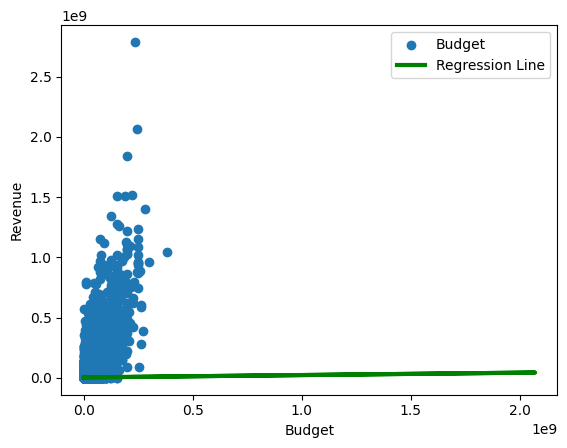

In [ ]:
plt.scatter(X, y, label='Budget')
plt.plot(X_test, predict_LR_test, color = 'green', linewidth=3, label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
I = load_iris

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
learning(X_train, y_train, X_test, y_test, DT)

Training accuracy: 0.805
Testing accuracy: 0.836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


DecisionTreeClassifier(max_depth=3)

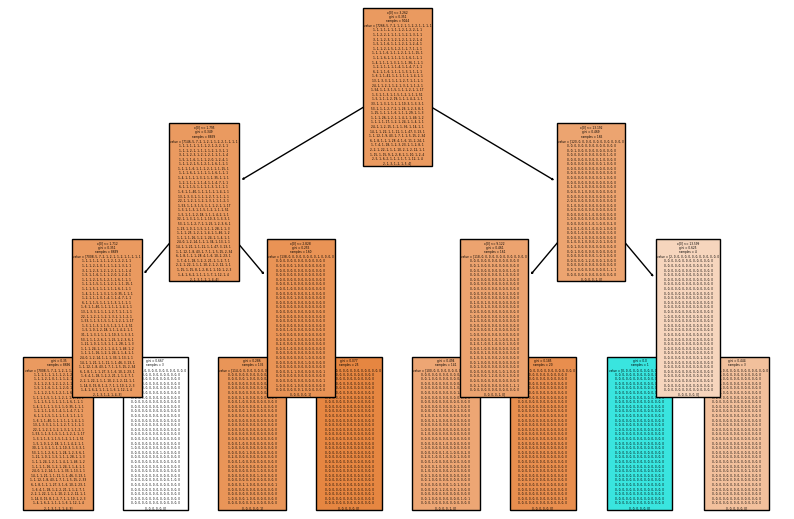

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(DT, filled =True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
learning(X_train_std, y_train, X_test_std, y_test, DT)

Training accuracy: 0.805
Testing accuracy: 0.836


DecisionTreeClassifier(max_depth=3)

In [ ]:
LR1 = LR.predict(X_test_std)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#from sklearn import metrics
#print('Performance of Linear Regression model on training set:')
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, LR1)
#print(metrics.classification_report(y_test,LR))

In [ ]:
learning(X_train_std, y_train, X_test_std, y_test, LR)

Training accuracy: 0.000
Testing accuracy: -0.010


LinearRegression()

In [ ]:
#print('Performance of the Decision Tree model on training set:')
#metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_LR_test)
#print(metrics.classification_report(y_test, predict_LR_test))